***DONE  BY PIYUSH WORLIKAR***





The IRIS dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'. The aim of the iris flower classification is to predict flowers based on their specific features.



IMPORT THE NECESSARY LIBRARIES:

In [91]:
import numpy as np       #NUMPY IS USED FOR NUMERICAL OPERATIONS
import pandas as pd # PANDAS FOR IMPORTING THE DATASET
from sklearn.model_selection import train_test_split    #TO SPLIT DATA INTO TRAINING AND TESTING DATA
from  sklearn.tree import DecisionTreeClassifier    #FOR DECSION TREE CLASSIFIER
from sklearn.metrics import accuracy_score   #TO CHECK ACCURACY
import matplotlib.pyplot as plt     # FOR DATA VISUALIZATION PURPOSE
from sklearn import tree   # TO VISUALIZE THE TREE
import seaborn as sns     # FOR DATA VISUALIZATION

LOAD THE IRIS DATASET:

In [92]:
data = pd.read_csv("IRIS.csv")    # using the Pandas library's read_csv function. The dataset is stored in the data variable.
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


EXPLORE THE DATASET:  The code loads the Iris dataset and assigns the features (all columns except 'species') and target ('species') to separate variables.

In [93]:
data.head()                    # Display the first few rows of the dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
data.shape    # Check the shape of the dataset


(150, 5)

In [95]:
data.columns                   # Check the column names


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [96]:
data.describe()       #will display the stats of each column

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [97]:
data.info()   # provides a summary of the dataset, including the number of non-null values, data types of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
data.nunique()     #to check unique values

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [99]:
data['species'].unique()                # Check the unique values in the target variable (species)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [100]:
data['species'].value_counts()                    # Check the distribution of the target variable


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

DATA VISUALIZATION: This section creates a scatter plot of 'sepal_length' on the x-axis and 'sepal_width' on the y-axis. It visualizes the relationship between these two features in the Iris dataset.


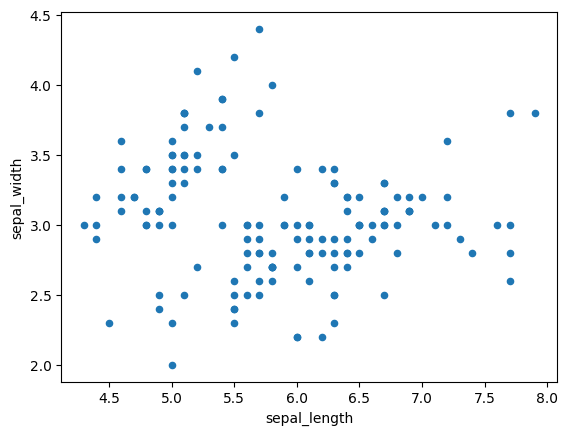

In [101]:
data.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()


In [ ]:
#Boxplots help identify the distribution, central tendency, and outliers in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e173a080>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e1738550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9e173b0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e1738eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e1739750>],
 'means': []}

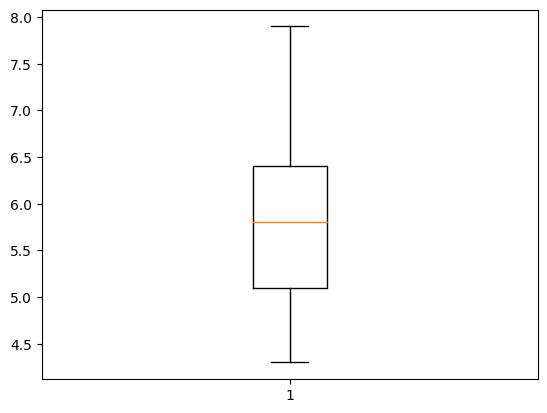

In [102]:
# boxplot - to check for outliers
plt.boxplot(data['sepal_length'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e17a02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e17a07f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9e1773fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e17a0d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e17a0fd0>],
 'means': []}

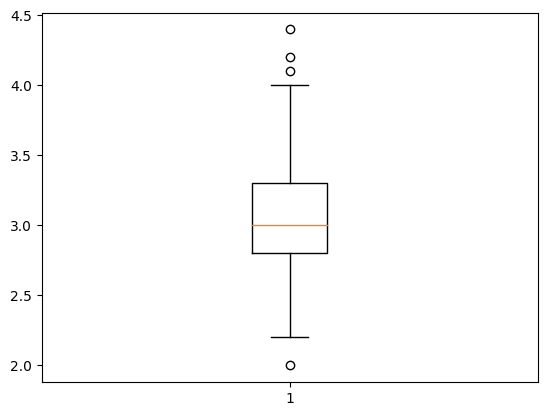

In [103]:
# boxplot
plt.boxplot(data['sepal_width'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e15eada0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e15eb2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9e15eab00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e15eb820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e15ebac0>],
 'means': []}

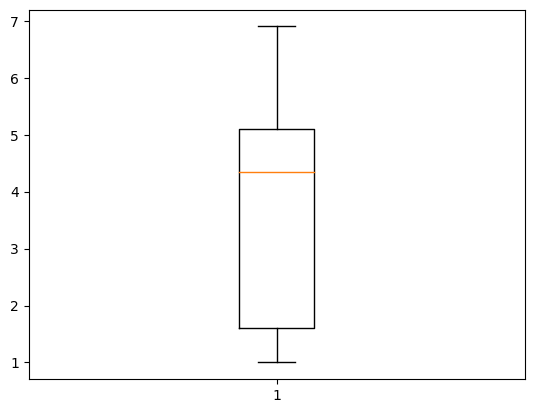

In [104]:
# boxplot
plt.boxplot(data['petal_length'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9e16665f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9e1666b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9e1666350>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9e1667070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9e1667310>],
 'means': []}

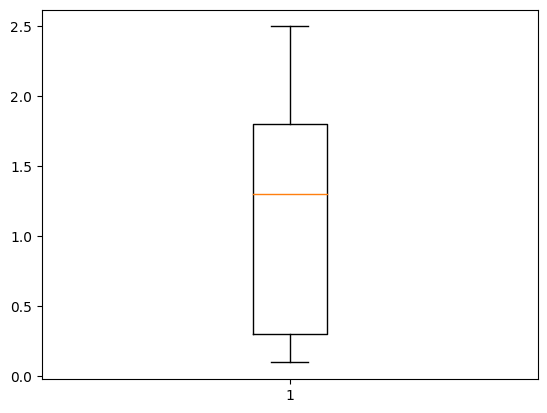

In [105]:
# boxplot
plt.boxplot(data['petal_width'])


<ipython-input-106-8259cf1f0e8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())      #correlation between each column and row


<Axes: >

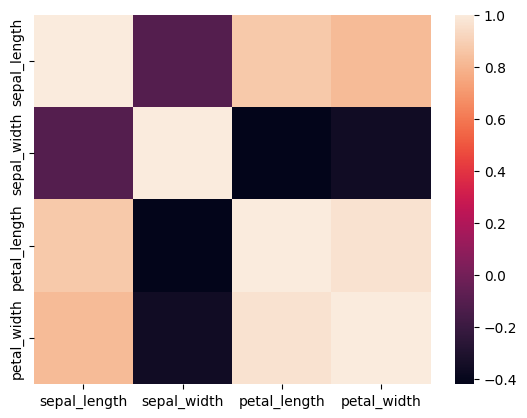

In [106]:
sns.heatmap(data.corr())      #correlation between each column and row

DATA PREPARATION: This section prepares the dataset by separating the features (X) and the target variable (y) and then splitting the data into training and testing sets using the train_test_split function.



In [107]:
features=data.drop("species", axis=1)
target=data["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

TRAIN THE DECISION TREE CLASSIFIER:
A decision tree classifier is instantiated and trained using the training data (x_train and y_train) using the fit method.



In [108]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

MAKE PREDICITIONS ON THE TEST SET

In [109]:
y_pred = clf.predict(x_test)

CALCULATE THE ACCURACY OF THE MODEL:

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


VISUALIZE THE DECISON TREE :

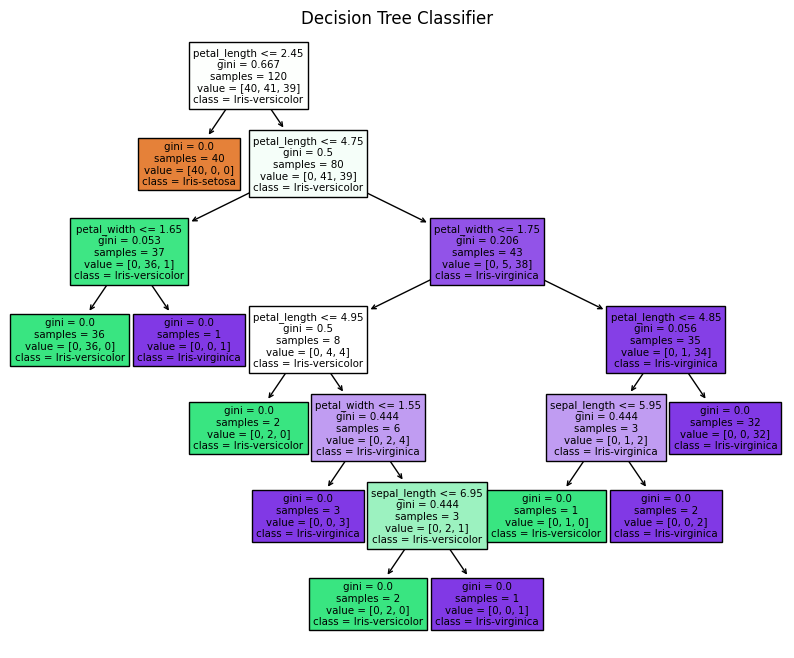

In [111]:
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(clf, feature_names=features.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

USING LOGISTIC REGRESSION:

A logistic regression model is instantiated and trained using the training data (X_train and y_train) using the fit method.

Prepare the data:






In [112]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


TRAIN THE LOGISTIC REGRESSION MODEL

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

MAKE PREDICTIONS:

In [114]:
predictions = model.predict(X_test)

EVALUATE THE MODEL:


In [115]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0
